# Key Insights


In [7]:
import pandas as pd
from plotnine import *
import plotly.express as px

NGRAMS_df = pd.read_csv('..\data\perception_data.csv')
weather_df = pd.read_csv("./data/weather_data.csv")

## Perception Insights

In [ ]:
# Plot the aggregated data
NGRAMS_rel_plot = (ggplot(NGRAMS_df) +
        aes(x='Year', y='Rain Relative Appearance %') +
        geom_line(color='blue') +
        labs(title='Relative Evolution of the rainy London stereotype', x='Year', y='Rain Relative Appearance %') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
NGRAMS_rel_plot.show()

The graph shows that in the 1940s, the “rainy London stereotype” had a relatively low prevalence. It then experienced some fluctuations, with a peak around 1960 and another smaller peak around 1980-1990. However, starting from around the year 2000, there was a significant and steep increase in the prevalence of this stereotype, reaching its highest point in recent times just before 2020. 
The overall shape of the graph suggests that while the “rainy London stereotype” has existed for a long time, it has become much more prominent and widespread in recent decades, particularly from the turn of the 21st century onwards. This could potentially be influenced by various factors, such as media representation, cultural perceptions, or even actual weather patterns in London during this period.


In [ ]:
# Define aesthetics
aesthetics = aes(x='Year', y='precipitation_hours', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Apperance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's rain data VS its perception", x='Years', y='Yearly average precipitation hours since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot.show()

In the early years post 1940, average precipitation hours were higher than in the post 2000s, yet the percent appearance of London as being a rainy city in literature was lowest around 1940 and highest around 2019. This shows how perception of London as a rainy city and the actual weather facts are negatively correlated, and that this stereotype is not justified by precipitation hours.


In [ ]:
# Define aesthetics
aesthetics = aes(x='Year', y='sunshine_duration', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot3 = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's sun VS its perception", x='Years', y='Yearly average sunshine duration since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot3.show()

There seems to be a negative correlation between sunshine duration and perception, implying there is a positive correlation between how cloudy London is and perception of London as a rainy city. This discovery could support our hypothesis that the stereotype is caused by how cloudy and gray London is, rather than how much it actually rains. Note: We can be sure that if there is a causal link it will be the weather data on the stereotypes, as the latter could not directly influence weather.


In [ ]:
# Define aesthetics
aesthetics = aes(x='Year', y='temperature_2m_mean', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot4 = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's temperature VS its perception", x='Years', y='Yearly average temperature mean since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot4.show()

We can guess a positive correlation between temperature mean and stereotype appearance. There could be several hypotheses to explain this, for instance, as London gets hotter, people, by opposition, notice bad, rainy weather more. Yet again, this would go along with our hypothesis that London is not considered a rainy city for the right reason (i.e. precipitation factors), but because of other effects, such as temperature in this case.

## Precipitation Hours Insights

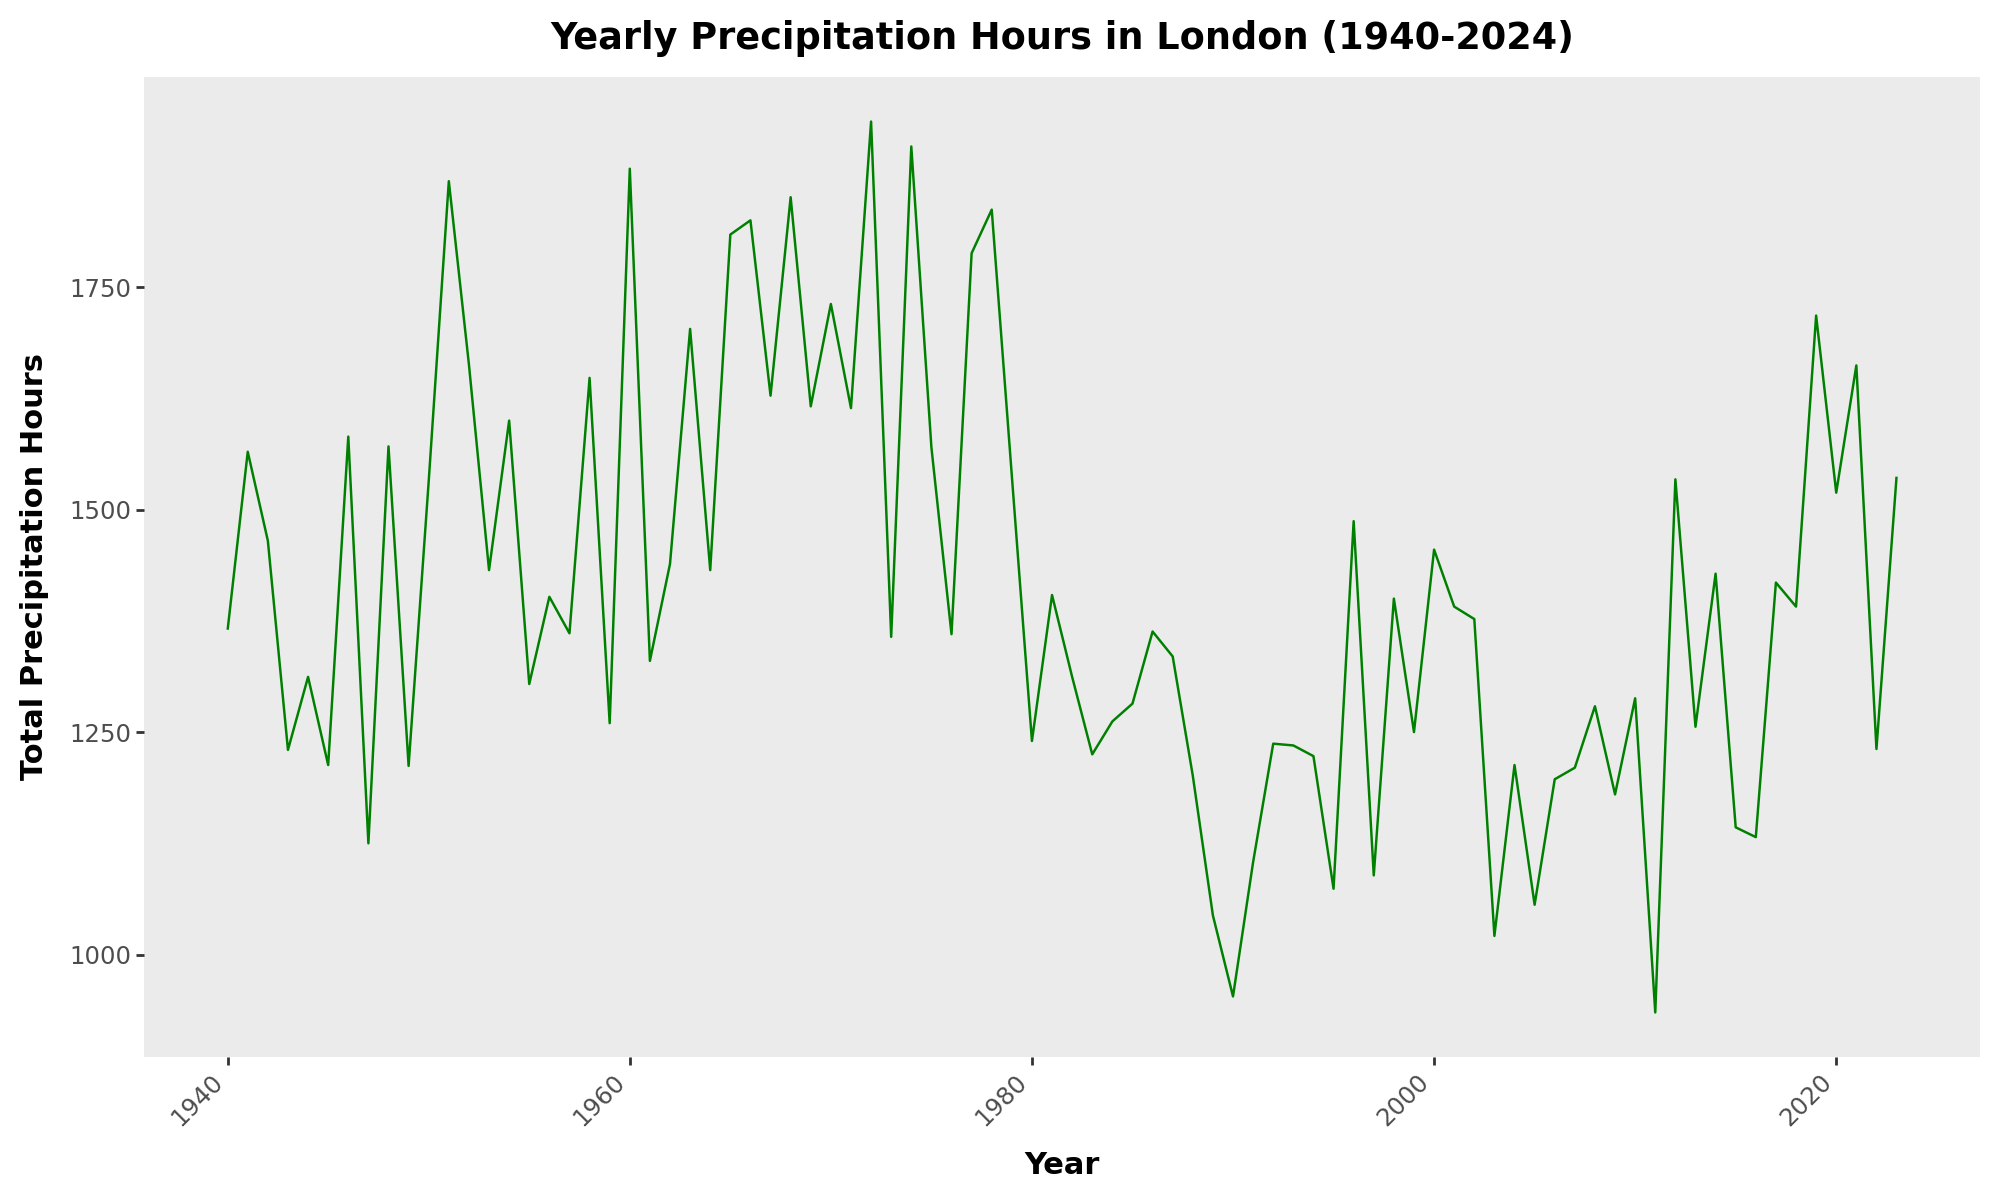

In [10]:
london_weather_df = weather_df[weather_df['city'] == 'London']
london_precipitation_plot_df = london_weather_df.loc[:,['date', 'precipitation_hours']]

london_precipitation_plot_df['date'] = pd.to_datetime(london_precipitation_plot_df['date'])

# Aggregating the data by year and calculating the total precipitation hours for each year
london_precipitation_plot_df['year'] = london_precipitation_plot_df['date'].dt.year
london_yearly_precipitation_plot_df = london_precipitation_plot_df.groupby('year')['precipitation_hours'].sum().reset_index()

# Plotting the aggregated data
yearly_precip_hours_plot = (ggplot(london_yearly_precipitation_plot_df) +
        aes(x='year', y='precipitation_hours') +
        geom_line(color='green') +
        labs(title='Yearly Precipitation Hours in London (1940-2024)', x='Year', y='Total Precipitation Hours') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6))  
       )

# Displaying the plot
yearly_precip_hours_plot.show()

Yearly Precipitation Hours in London: 
* The number of yearly precipitation hours in London exhibits high variability and fluctuations over the years, but does not display any clear long-term increasing or decreasing trend over the period (1940 to 2024). The data points show a fluctuating pattern, with some years having relatively low precipitation hour totals around 1000-1100 hours, while other years experience much higher values exceeding 1600-1700 hours. However, these wetter and drier years do not appear to follow any discernible trajectory, instead occurring in a more cyclical, irregular fashion across the multi-decade timeframe.
The overall dataset does not reveal an overarching climatic shift towards more precipitation hours or fewer precipitation hours in London when viewed across this extended timescale from 1940 to 2024. The high variability seems to be more characteristic of the region's typical precipitation patterns.

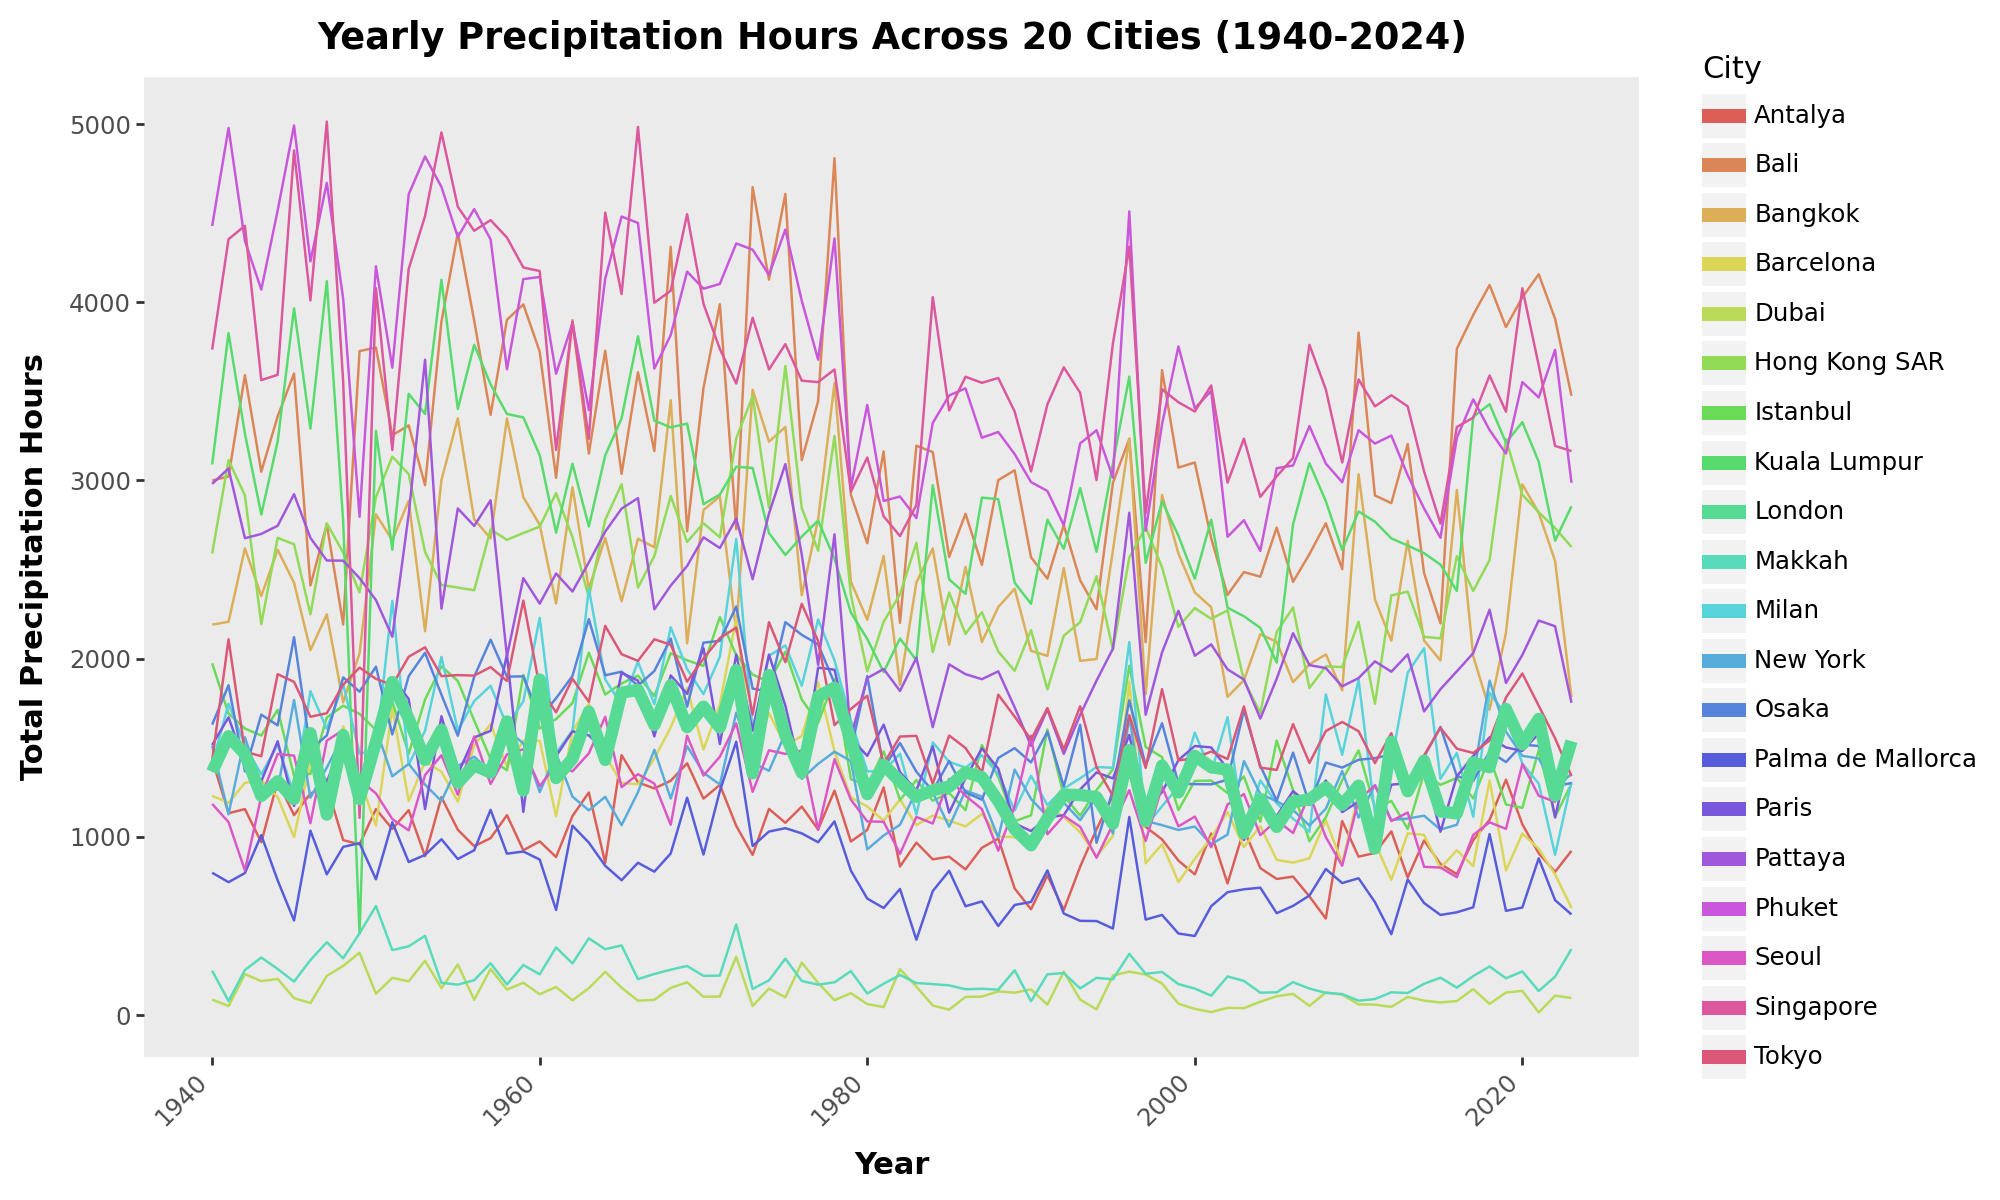

In [30]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
all_cities_yearly_precipitation_hours_plot_df = weather_df.groupby(['city', 'year'])['precipitation_hours'].sum().reset_index()


#Plotting aggregate data
yearly_precip_hours_plot = (ggplot(all_cities_yearly_precipitation_hours_plot_df) +
    aes(x='year', y='precipitation_hours', color='city') +
    geom_line() +
    geom_line(data=all_cities_yearly_precipitation_hours_plot_df[all_cities_yearly_precipitation_hours_plot_df['city'] == 'London'], 
             size=2.5, alpha=1) +  # Setting a thicker line width for London
    labs(title='Yearly Precipitation Hours Across 20 Cities (1940-2024)', x='Year', y='Total Precipitation Hours', color='City') +
    theme(axis_text_x=element_text(angle=45, hjust=1),
          axis_title=element_text(weight='bold'),
          plot_title=element_text(weight='bold'),
          panel_grid=element_blank()) +
    theme(figure_size=(10, 6))
)

# Displaying the plot
yearly_precip_hours_plot.show()

Yearly Precipitation Hours Across 20 Cities: 
* On average, London's annual precipitation (shown in bold light green) hours tend to fluctuate between 1,000 and 2,000 hours, which is consistently among the lower values compared to many other cities like Antalya, Bali, Bangkok, and Hong Kong SAR. The graph suggests that London receives less total precipitation than some cities known for their rainy weather. This provides evidence that London might not be the rainiest city out there, even if it has a reputation for it. 
* This graph supports the hypothesis that London's rainfall levels are not as extreme as the perception might suggest, at least in comparison to many other major cities worldwide. While London does experience fluctuations in rainfall over the years, its levels are generally moderate compared to some of the rainier cities plotted.

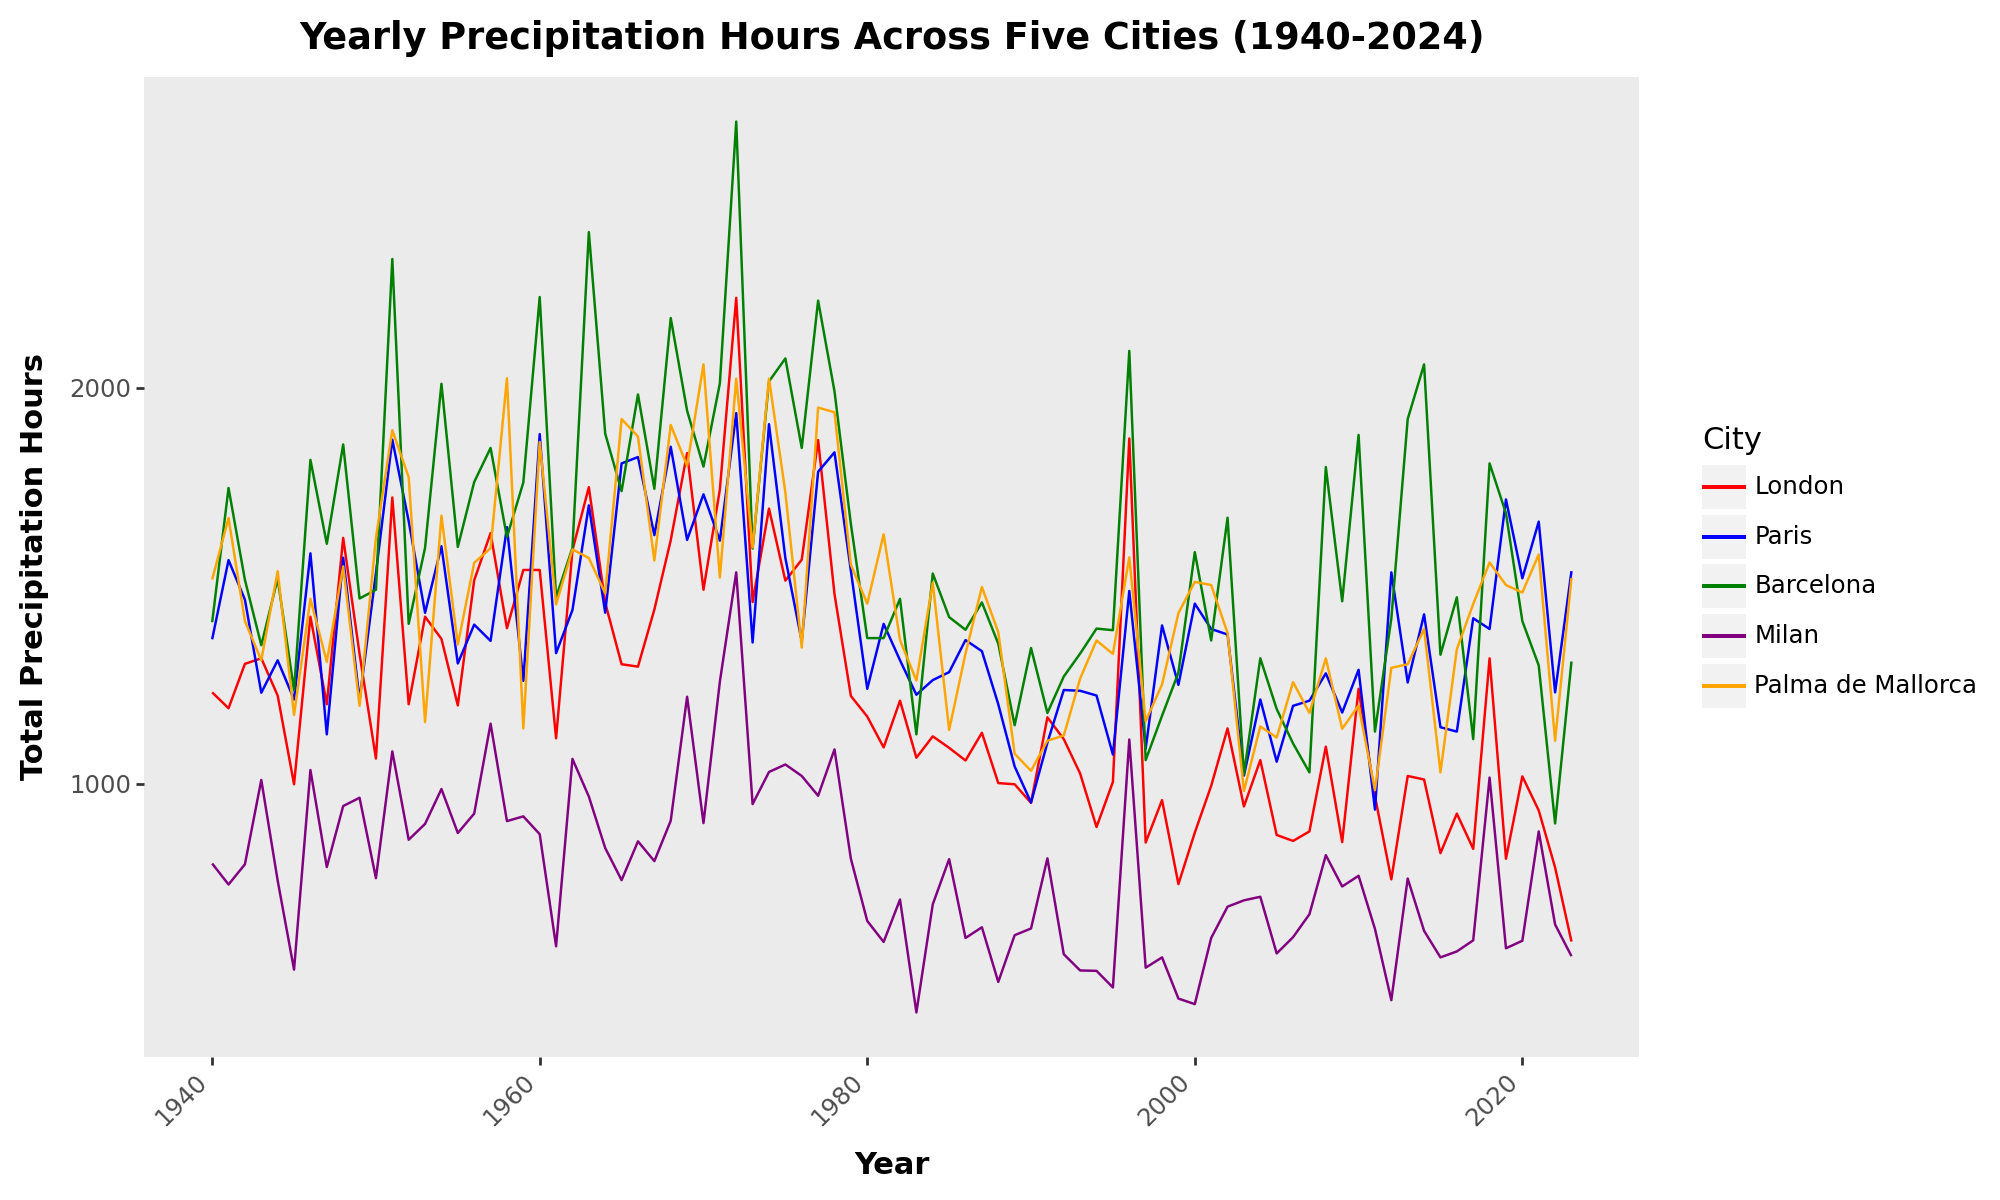

In [29]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year

european_cities = ['Barcelona', 'London', 'Milan', 'Palma de Mallorca', 'Paris']

european_cities_df = weather_df[weather_df['city'].isin(european_cities)]
european_cities_yearly_precipitation_hours_plot_df = european_cities_df.groupby(['city', 'year'])['precipitation_hours'].sum().reset_index()

city_colors = {"London": "red", "Paris": "blue", "Barcelona": "green", "Milan": "purple", "Palma de Mallorca": "orange"}


# Plotting aggregate data 
yearly_precip_hours_eurocities_plot = (ggplot(european_cities_yearly_precipitation_hours_plot_df) +
    aes(x='year', y='precipitation_hours', color='city') +
    geom_line() +
    labs(title='Yearly Precipitation Hours Across Five Cities (1940-2024)', x='Year', y='Total Precipitation Hours', color='City') +
    theme(axis_text_x=element_text(angle=45, hjust=1),
          axis_title=element_text(weight='bold'),
          plot_title=element_text(weight='bold'),
          panel_grid=element_blank()) +
    theme(figure_size=(10, 6)) +
    scale_color_manual(values=list(city_colors.values()), labels=list(city_colors.keys()))
)

# Displaying the plot
yearly_precip_hours_eurocities_plot.show()

Yearly Precipitation Hours Across Five Cities: 
* Compared to other European cities, London appears to have lower annual precipitation. For instance, in many of the years it consistently places as the second-least rainy city. While Paris (Blue) and London (Red) have similar precipitation patterns, London's levels are often slightly lower than Paris. Additionally, London's rainfall is noticeably lower than cities like Barcelona and Palma de Mallorca, especially in recent years.
* This graph supports the notoin that London's rainfall levels are not as intense as the perception might suggest, at least in comparison to some neighboring European cities. While London does experience periods of higher precipitation, the data indicates that its yearly rainfall hours tend to be relatively moderate and lower than many other locations. 

In [25]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
all_cities_yearly_precipitation_hours_plot_df = weather_df.groupby(['city', 'year'])['precipitation_hours'].sum().reset_index()

# Creating Plotly figure
fig_1 = px.line(all_cities_yearly_precipitation_hours_plot_df, x='year', y='precipitation_hours', color='city',
              title='Yearly Precipitation Hours Across 20 Cities (1940-2024)',
              labels={'precipitation_hours': 'Total Precipitation Hours', 'year': 'Year', 'city': 'City'})

# Adding a range slider for year selection
fig_1.update_layout(xaxis=dict(rangeslider=dict(visible=True)))

fig_1.show()

## Precipitation Sum Insights

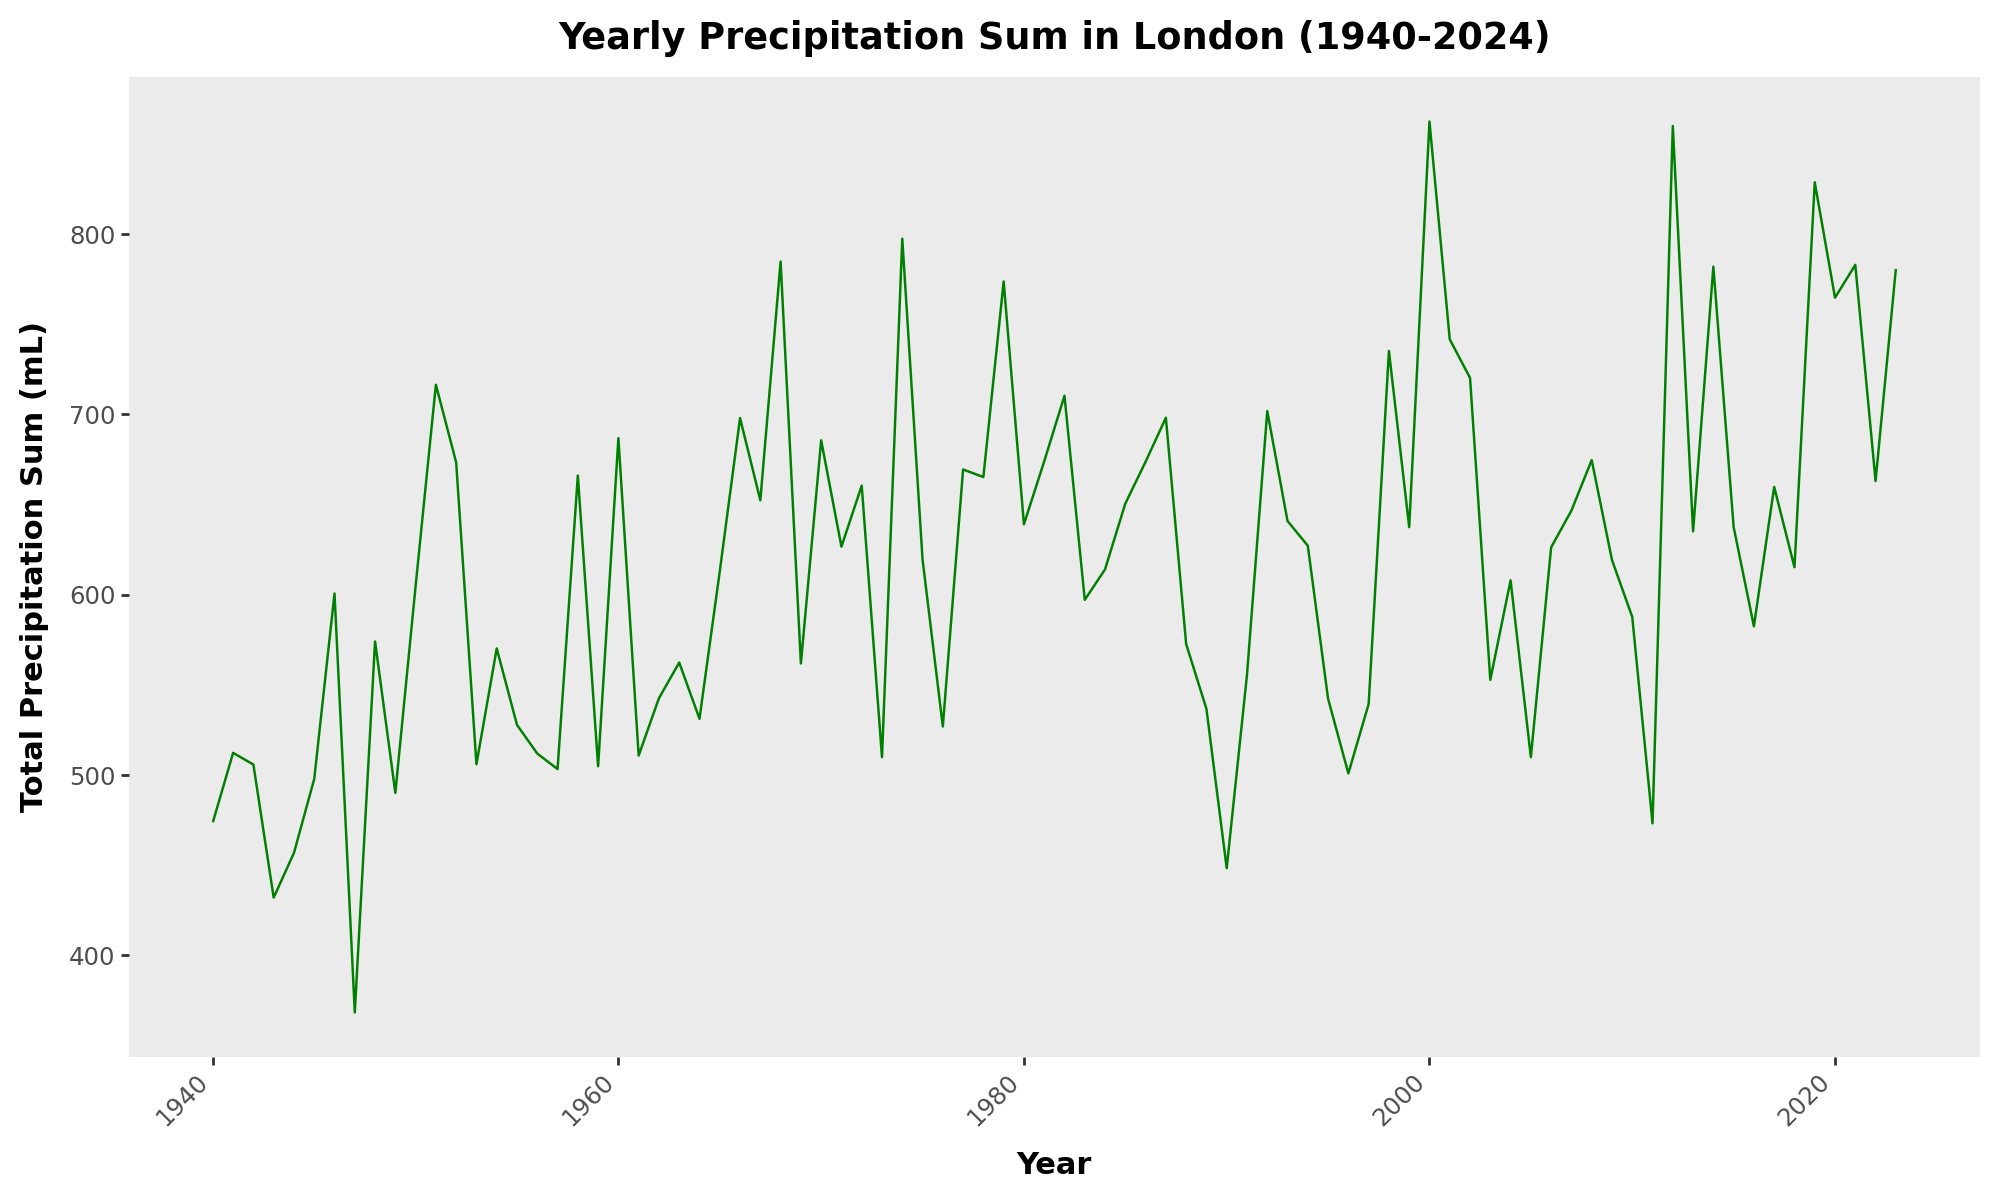

In [27]:
london_weather_df = weather_df[weather_df['city'] == 'London']
london_precipitation_plot_df = london_weather_df.loc[:,['date', 'precipitation_sum']]

london_precipitation_plot_df['date'] = pd.to_datetime(london_precipitation_plot_df['date'])

# Aggregating the data by year and calculating the total precipitation hours for each year
london_precipitation_plot_df['year'] = london_precipitation_plot_df['date'].dt.year
london_yearly_precipitation_sum_plot_df = london_precipitation_plot_df.groupby('year')['precipitation_sum'].sum().reset_index()


# Plotting the aggregated data
yearly_precip_sum_plot = (ggplot(london_yearly_precipitation_sum_plot_df) +
        aes(x='year', y='precipitation_sum') +
        geom_line(color='green') +
        labs(title='Yearly Precipitation Sum in London (1940-2024)', x='Year', y='Total Precipitation Sum (mL)') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6)) 
       )

yearly_precip_sum_plot.show()

Yearly Precipitation Sum in London: 
*  London appears to experience a highly variable precipitation pattern from year to year, with no clear long-term trend towards becoming significantly wetter or drier over the time period shown (1940-2024).
The yearly precipitation sums fluctuate considerably, with some years seeing relatively low rainfall around 400-500 ml, while other years exceed 700-800 ml of total precipitation. However, these wet and dry years seem to occur in a more cyclical, random pattern rather than following a steadily increasing or decreasing trajectory over multiple decades.
So while certain individual years or short periods may be noticeably wetter or drier than average in London, the data does not reveal an overarching long-term climatic shift towards more rainy or more arid conditions in the region when viewed over this multi-decade timescale.


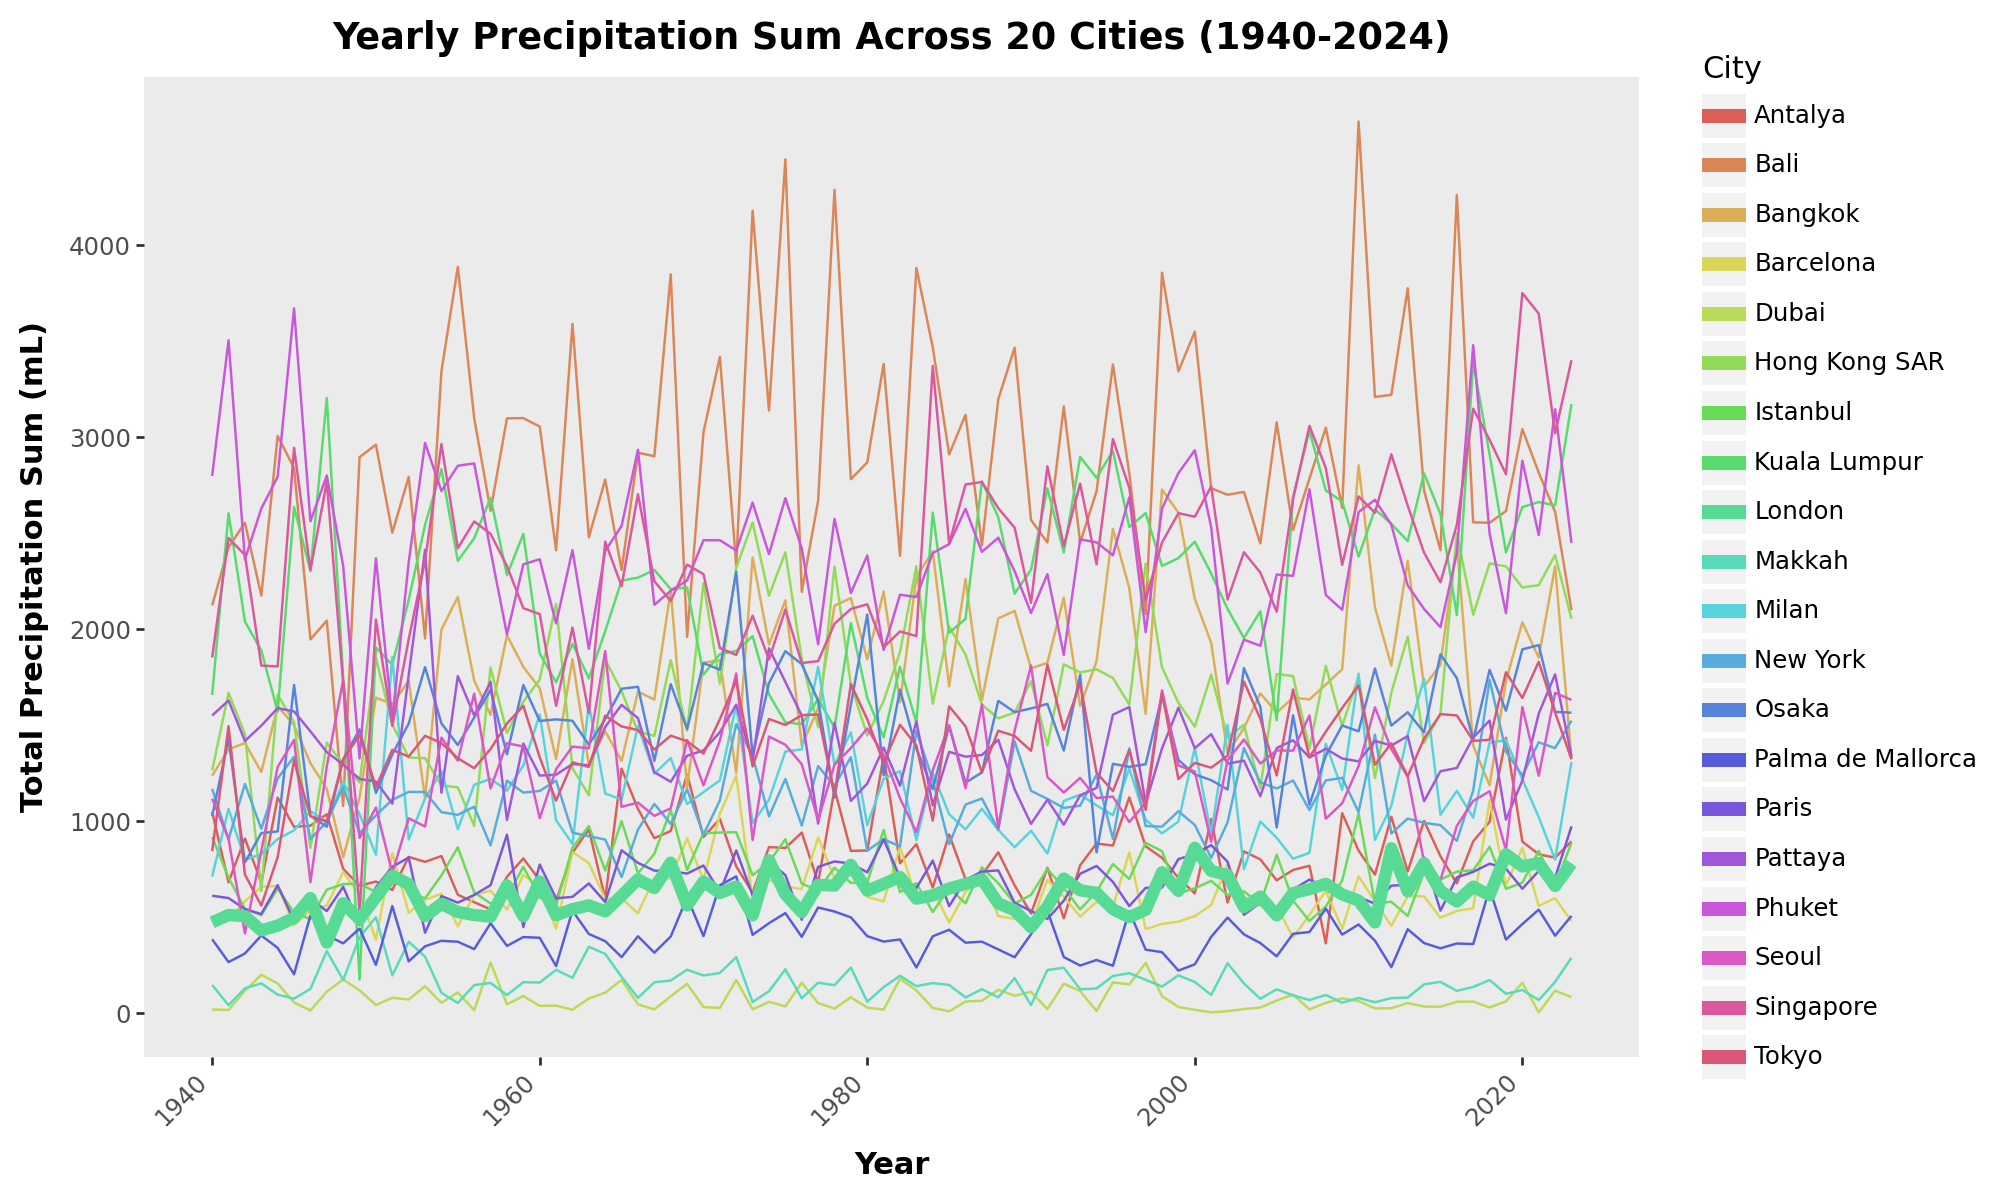

In [28]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
all_cities_yearly_precipitation_sum_plot_df = weather_df.groupby(['city', 'year'])['precipitation_sum'].sum().reset_index()


# Plotting the aggregate data 
yearly_precip_sum_plot = (ggplot(all_cities_yearly_precipitation_sum_plot_df) +
    aes(x='year', y='precipitation_sum', color='city') +
    geom_line() +
    geom_line(data=all_cities_yearly_precipitation_sum_plot_df[all_cities_yearly_precipitation_sum_plot_df['city'] == 'London'], 
             size=2.5, alpha=1) +  # Setting a thicker line width for London
    labs(title='Yearly Precipitation Sum Across 20 Cities (1940-2024)', x='Year', y='Total Precipitation Sum (mL)', color='City') +
    theme(axis_text_x=element_text(angle=45, hjust=1),
          axis_title=element_text(weight='bold'),
          plot_title=element_text(weight='bold'),
          panel_grid=element_blank()) +
    theme(figure_size=(10, 6))
)

yearly_precip_sum_plot.show()

Yearly Precipitation Sum Across 20 Cities: 
* London's precipitation sum (shown in bold light green) is consistently among the lower values compared to cities like Antalya, Bali, Bangkok, and Hong Kong SAR which have much higher rainfall sums. London's precipitation sum tends to stay below 1000mm. There is a fair amount of year-to-year variability, but London maintains a relatively consistent, moderate rainfall pattern compared to the more extreme values seen in other cities on this global scale.
* This precipitation sum graphs further reinforces the hypothesis that London does not receive as much annual rainfall as many perceive or compared to other cities globally. London's yearly precipitation totals appear to be relatively modest, lending support to the idea that its reputation for constant rain may be somewhat exaggerated when viewed in a broader context.


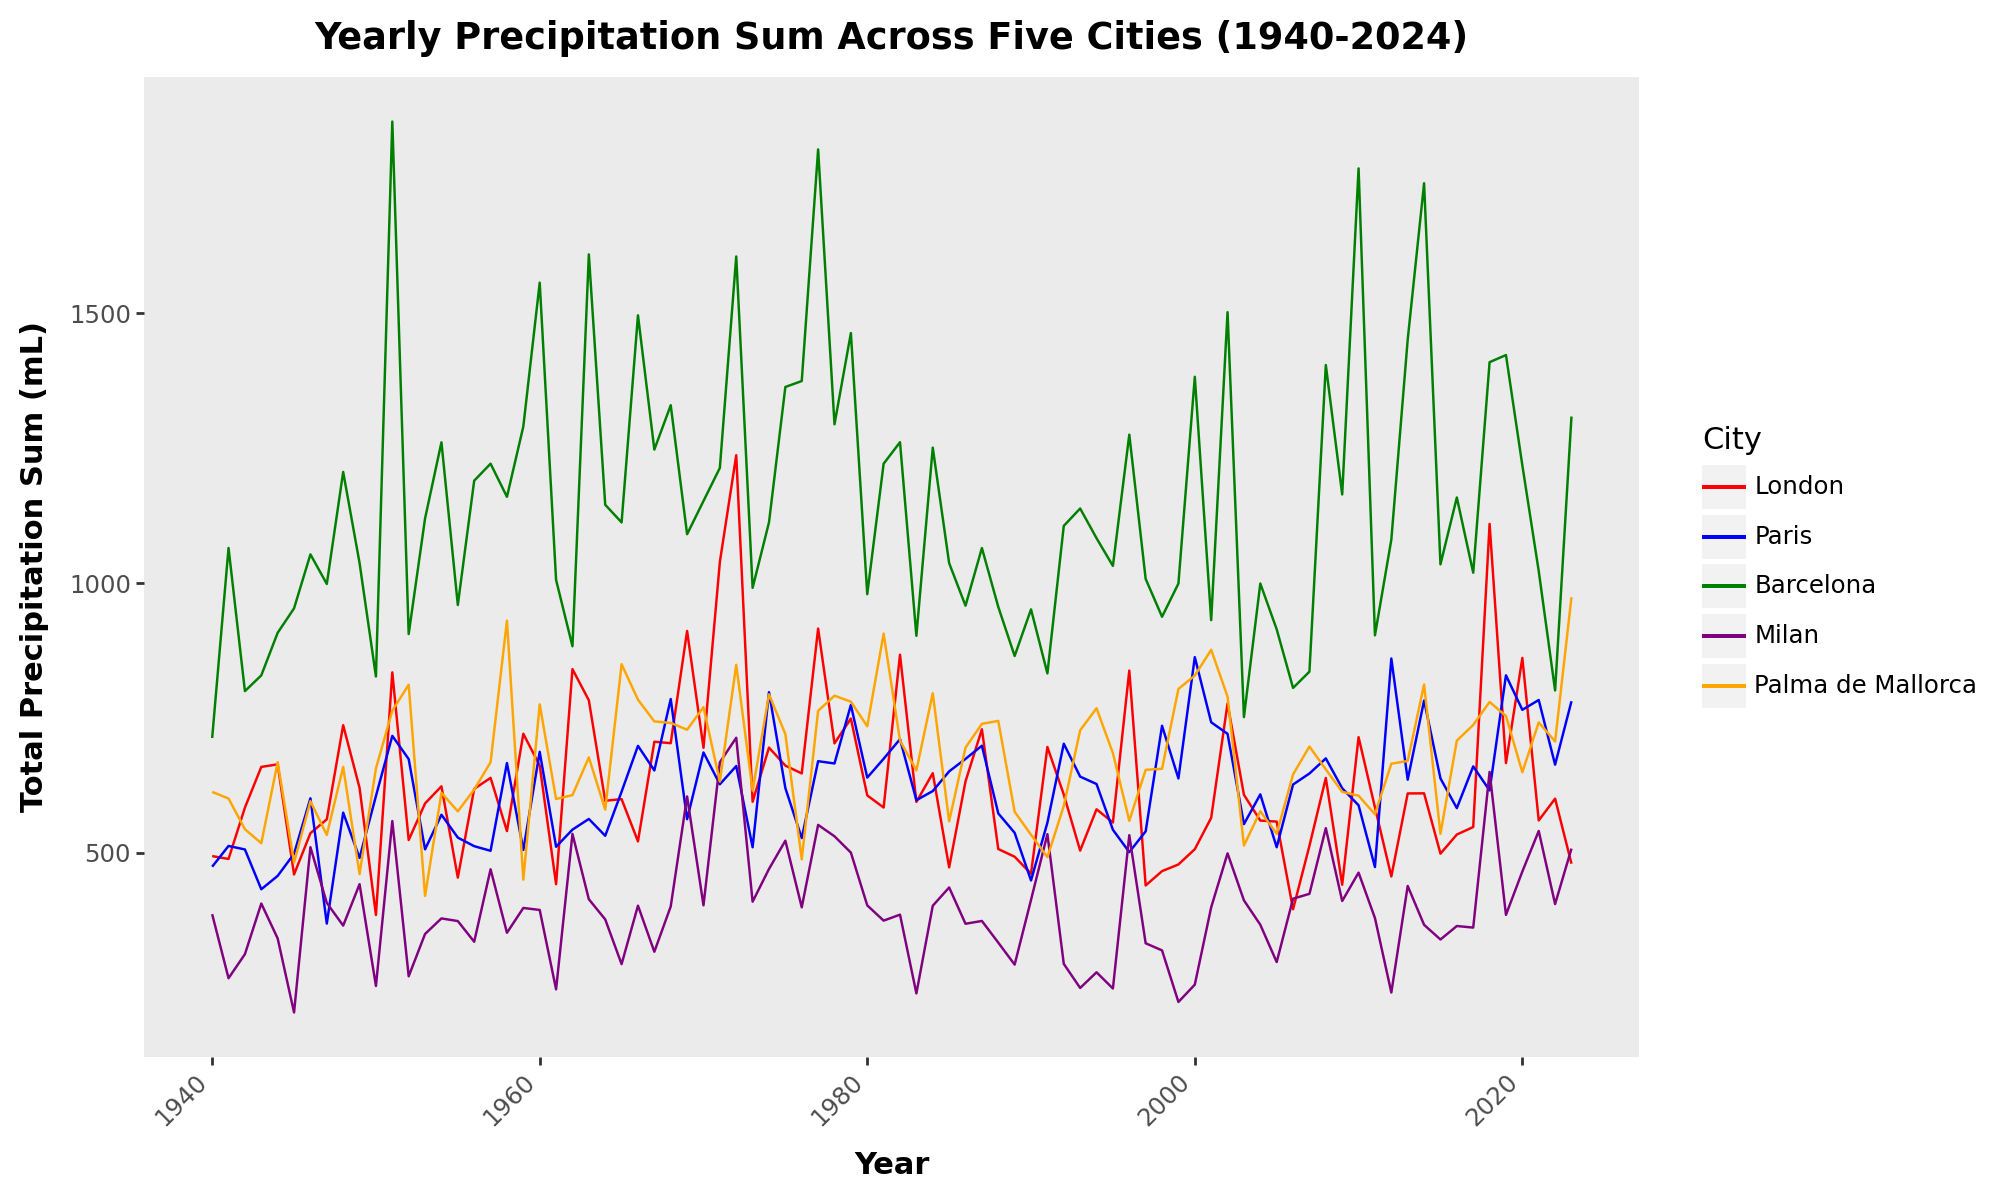

In [26]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year

european_cities = ['Barcelona', 'London', 'Milan', 'Palma de Mallorca', 'Paris']

european_cities_df = weather_df[weather_df['city'].isin(european_cities)]
european_cities_yearly_precipitation_sum_plot_df = european_cities_df.groupby(['city', 'year'])['precipitation_sum'].sum().reset_index()                    

city_colors = {"London": "red", "Paris": "blue", "Barcelona": "green", "Milan": "purple", "Palma de Mallorca": "orange"}


# Plotting the aggregated data
yearly_precip_sum_eurocities_plot = (ggplot(european_cities_yearly_precipitation_sum_plot_df) +
    aes(x='year', y='precipitation_sum', color='city') +
    geom_line() +
    labs(title='Yearly Precipitation Sum Across Five Cities (1940-2024)', x='Year', y='Total Precipitation Sum (mL)', color='City') +  
    theme(axis_text_x=element_text(angle=45, hjust=1),
          axis_title=element_text(weight='bold'),
          plot_title=element_text(weight='bold'),
          panel_grid=element_blank()) +
    theme(figure_size=(10, 6)) +
    scale_color_manual(values=list(city_colors.values()), labels=list(city_colors.keys()))  # Legend color mapping
)

# Displaying the plot
yearly_precip_sum_eurocities_plot.show()

Yearly Precipitation Sum Across Five Cities: 
* This graph provides a clearer regional comparison. Here we can see that London's precipitation sum has some years with relatively higher precipitation sums (such as around 1970s and 2018), these tend to be more infrequent and less extreme compared to the other cities shown. Regardless of these two instances, London's data seems to track closely with Paris and Palma de Mallorca's precipitation sums. 
* This precipitation sum graphs further reinforces the hypothesis that London does not receive as much annual rainfall as many perceive or compared to other major cities regionally. Overall, London's yearly precipitation totals appear to be relatively modest, lending support to the idea that its reputation for constant rain may be somewhat exaggerated when viewed in a broader context.

In [24]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
all_cities_yearly_precipitation_hours_plot_df = weather_df.groupby(['city', 'year'])['precipitation_hours'].sum().reset_index()

# Creating Plotly figure
fig_2 = px.line(all_cities_yearly_precipitation_sum_plot_df, x='year', y='precipitation_sum', color='city',
              title='Yearly Precipitation Sum Across 20 Cities (1940-2024)',
              labels={'precipitation_sum': 'Total Precipitation Sum (mL)', 'year': 'Year', 'city': 'City'})

# Adding a range slider for year selection
fig_2.update_layout(xaxis=dict(rangeslider=dict(visible=True)))

fig_2.show()